## Tutorial: Visualizing Identity and Access Management data set with Memgraph

This notebook showcases the utilization of Graphistry to visualize data from Memgraph using a sample dataset related to a company's Identity and Access Management. We'll demonstrate how Graphistry streamlines the visualization of Cypher queries, making it easier to analyze extensive data effectively.

#### About the dataset

Identity and Access Management (IAM) outlines who can access what, why, and when. Each organization's unique identity and structure shape how access is managed, forming the company's IAM. If the current IAM system becomes slow and unresponsive – unable to handle changes in team roles and permissions – graph databases are a leading solution. 

#### About Memgraph

[Memgraph](https://memgraph.com/) is an open-source, in-memory graph database. It is compatible with Neo4j's Bolt protocol and supports the widely used Cypher query language for interacting with the database. Cypher provides a powerful and expressive way to work with graph structures and perform various operations on the nodes and relationships within a graph database.

A convenient entry point to kickstart your journey with Memgraph is through Docker. By simply entering the following command in your terminal, you can set up the Memgraph Platform within a Docker container:


If everything went well, after a couple of seconds you should see a message that Memgraph Lab is running at localhost:3000. You can access it through your web browser and start exploring !

#### Configuration and installation

To begin, make sure to install the Graphistry Python client and the Neo4j Bolt drivers. You can achieve this by removing the comment symbol (#) from the first two lines in the provided code snippet.

In [7]:
#!pip install --user graphistry
#!pip install --user graphistry[bolt]

Next, import the necessary dependencies, including pandas, graphistry, and GraphDatabase. These libraries will be utilized to load and work with the data.

In [1]:
import pandas as pd
import graphistry
from neo4j import GraphDatabase

Lastly, establish a connection with your Graphistry GPU server account. Make sure to substitute the connection string and password with your personal credentials. You can create your account [here](https://hub.graphistry.com/). For additional configuration options, refer to [GitHub](https://github.com/graphistry/pygraphistry#configure).

In [2]:
# To specify Graphistry account & server, use:
# graphistry.register(api=3, username='...', password='...', protocol='https', server='hub.graphistry.com')
graphistry.register(api=3, username='k', password='123Rocky') 

#### Connecting to Graphistry and Memgraph

We'll establish a connection to a Memgraph database using the Bolt protocol. The Bolt protocol is a binary communication protocol that facilitates interaction between the Python code and the Memgraph database.

The URI includes the hostname (localhost) and the port number (7687) where the Memgraph database is listening for Bolt connections. The authentication part includes a tuple with the username and the password that you would use to authenticate and gain access to the Memgraph database. 



In [3]:
MEMGRAPH = {
    'uri': "bolt://localhost:7687", 
    'auth': (" ", " ")
}

After that, we can use the Graphistry library to register a connection to a database using the Bolt protocol and the provided configuration.


In [4]:
graphistry.register(bolt=MEMGRAPH)

#### Uploading the dataset

We can now initialize a Memgraph driver instance. Following this, we'll be able to utilize the session.run() method to execute Cypher queries.

In [11]:
driver = GraphDatabase.driver(**MEMGRAPH)

with driver.session() as session:      
    session.run(""" CREATE (per1:Person {id: 1, name: "Julie"})
CREATE (per2:Person {id: 2, name: "Peter"})
CREATE (per3:Person {id: 3, name: "Anna"})
CREATE (per4:Person {id: 4, name: "Carl"})
CREATE (tea1:Team {id: 1, name: "Engineering"})
CREATE (tea2:Team {id: 2, name: "Operations"})
CREATE (tea3:Team {id: 3, name: "Marketing"})
CREATE (rep1:Repository {id: 1, name: "Memgraph"})
CREATE (rep2:Repository {id: 2, name: "MAGE"})
CREATE (rep3:Repository {id: 3, name: "Marketing"})
CREATE (com1:Company {id: 1, name: "Memgraph"})
CREATE (sto1:Storage {id: 1, name: "Google Drive"})
CREATE (sto2:Storage {id: 2, name: "Notion"})
CREATE (fol1:Folder {id: 1, name: "engineering_folder"})
CREATE (fol2:Folder {id: 2, name: "operations_folder"})
CREATE (acc1:Account {id: 1, name: "Facebook"})
CREATE (acc2:Account {id: 2, name: "LinkedIn"})
CREATE (acc3:Account {id: 3, name: "HackerNews"}) 
CREATE (fil1:File {id: 1, name: "welcome_to_engineering.txt"})
CREATE (fil2:File {id: 2, name: "welcome_to_memgraph.txt"})
CREATE (fil3:File {id: 3, name: "operations101.txt"})
CREATE (fil4:File {id: 4, name: "expenses2022.csv"})
CREATE (fil5:File {id: 5, name: "salaries2022.csv"})
CREATE (fil6:File {id: 6, name: "engineering101.txt"})
CREATE (fil7:File {id: 7, name: "working_with_github.txt"})
CREATE (fil8:File {id: 8, name: "working_with_notion.txt"})
CREATE (fil9:File {id: 9, name: "welcome_to_marketing.txt"})
CREATE (per1)-[:HAS_ACCESS_TO]->(fil2)
CREATE (per2)-[:HAS_ACCESS_TO]->(fil2)               
CREATE (per2)-[:IS_PART_OF]->(tea1)
CREATE (per2)-[:IS_PART_OF]->(com1)
CREATE (per2)-[:IS_PART_OF]->(tea2)
CREATE (per3)-[:IS_PART_OF]->(tea2)
CREATE (per3)-[:IS_PART_OF]->(tea3)
CREATE (per3)-[:IS_PART_OF]->(com1)
CREATE (per4)-[:IS_PART_OF]->(tea1)
CREATE (per4)-[:IS_PART_OF]->(com1)
CREATE (per4)-[:HAS_ACCESS_TO]->(fil2)
CREATE (com1)-[:HAS_TEAM]->(tea1)
CREATE (com1)-[:HAS_TEAM]->(tea3)
CREATE (com1)-[:HAS_TEAM]->(tea2)
CREATE (fil1)-[:IS_STORED_IN]->(sto1)
CREATE (fil1)-[:IS_STORED_IN]->(sto2)
CREATE (fol2)-[:IS_STORED_IN]->(sto1)
CREATE (fil9)-[:IS_STORED_IN]->(sto1)
CREATE (fil9)-[:IS_STORED_IN]->(sto2)
CREATE (fol1)-[:IS_STORED_IN]->(sto1)
CREATE (fil2)-[:CREATED_BY]->(per3)
CREATE (fol1)-[:HAS_ACCESS_TO]->(fil6)
CREATE (fol1)-[:HAS_ACCESS_TO]->(fil7)
CREATE (fol1)-[:HAS_ACCESS_TO]->(fil8)
CREATE (fol2)-[:HAS_ACCESS_TO]->(fil3)
CREATE (fol2)-[:HAS_ACCESS_TO]->(fil4)
CREATE (fol2)-[:HAS_ACCESS_TO]->(fil5)
CREATE (tea2)-[:HAS_ACCESS_TO]->(fol2)
CREATE (rep3)-[:HAS_ACCESS_TO]->(acc1)
CREATE (rep3)-[:HAS_ACCESS_TO]->(acc2)
CREATE (rep3)-[:HAS_ACCESS_TO]->(acc3)
CREATE (rep3)-[:HAS_ACCESS_TO]->(fil9)
CREATE (tea1)-[:HAS_ACCESS_TO]->(rep1)
CREATE (tea1)-[:HAS_ACCESS_TO]->(rep2)
CREATE (tea1)-[:HAS_ACCESS_TO]->(rep3)
CREATE (tea1)-[:HAS_ACCESS_TO]->(fil1)
CREATE (tea1)-[:HAS_ACCESS_TO]->(fol1)
                """)

In [12]:
g = graphistry.cypher(""" MATCH (node1)-[connection]-(node2) RETURN node1, connection, node2;
  """)

#### Visualization of the data 


After populating Memgraph instance, it's time to visualize the dataset with graphistry. But first, let's see the graph schema in Memgraph Lab. It defines the structure of your data and its relationships, providing a blueprint for how your data elements are connected and organized within the graph database and  offers interactive graph visualizations.


![Screenshot from 2023-08-31 13-12-54.png](<attachment:Screenshot from 2023-08-31 13-12-54.png>)
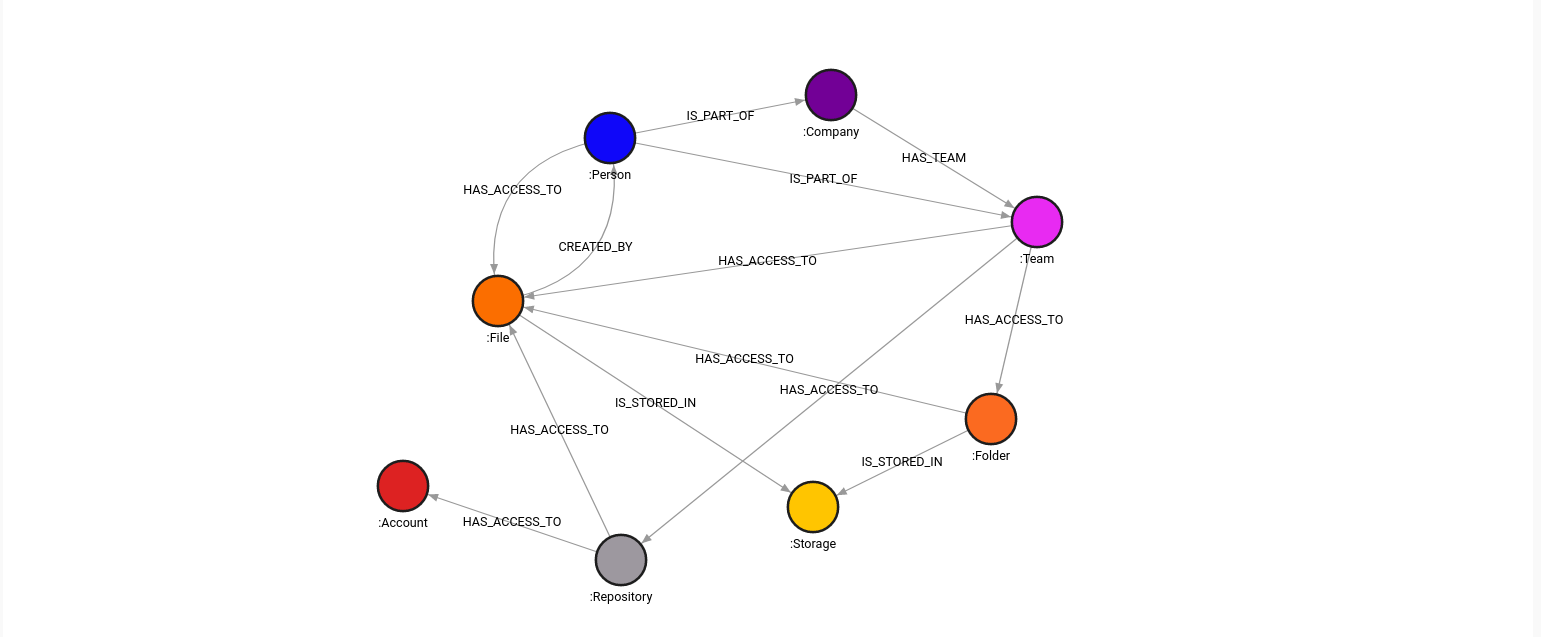

Plotting with grapistry is done by the following simple command:


In [13]:
g.plot()

Screenshot:

![Screenshot from 2023-08-31 18-48-56.png](<attachment:Screenshot from 2023-08-31 18-48-56.png>)
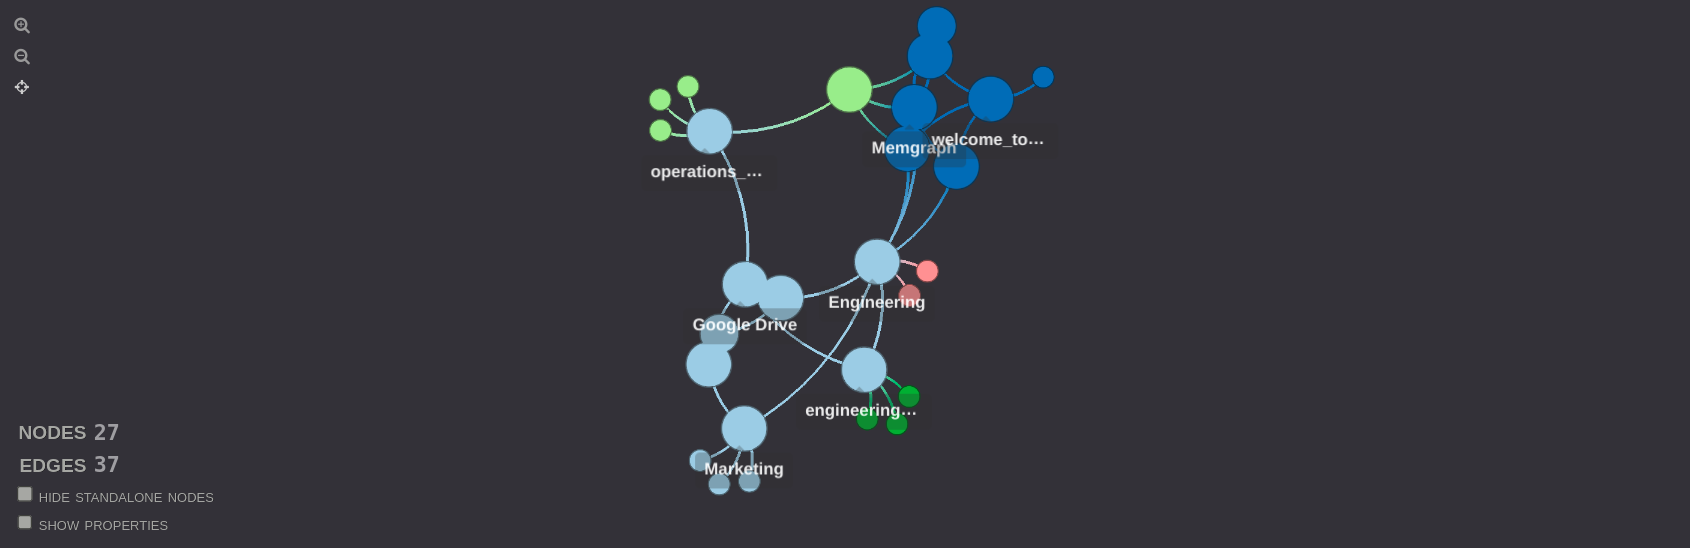

We can easily investigate which files Carl has access to.

In [14]:
direct_file_access_Carl = graphistry.cypher("""  MATCH (j:Person {name:"Carl"})-[r:HAS_ACCESS_TO]->(n)
RETURN *;  """)
direct_file_access_Carl.plot()

Screenshot:


![Screenshot from 2023-08-31 18-50-30.png](<attachment:Screenshot from 2023-08-31 18-50-30.png>)
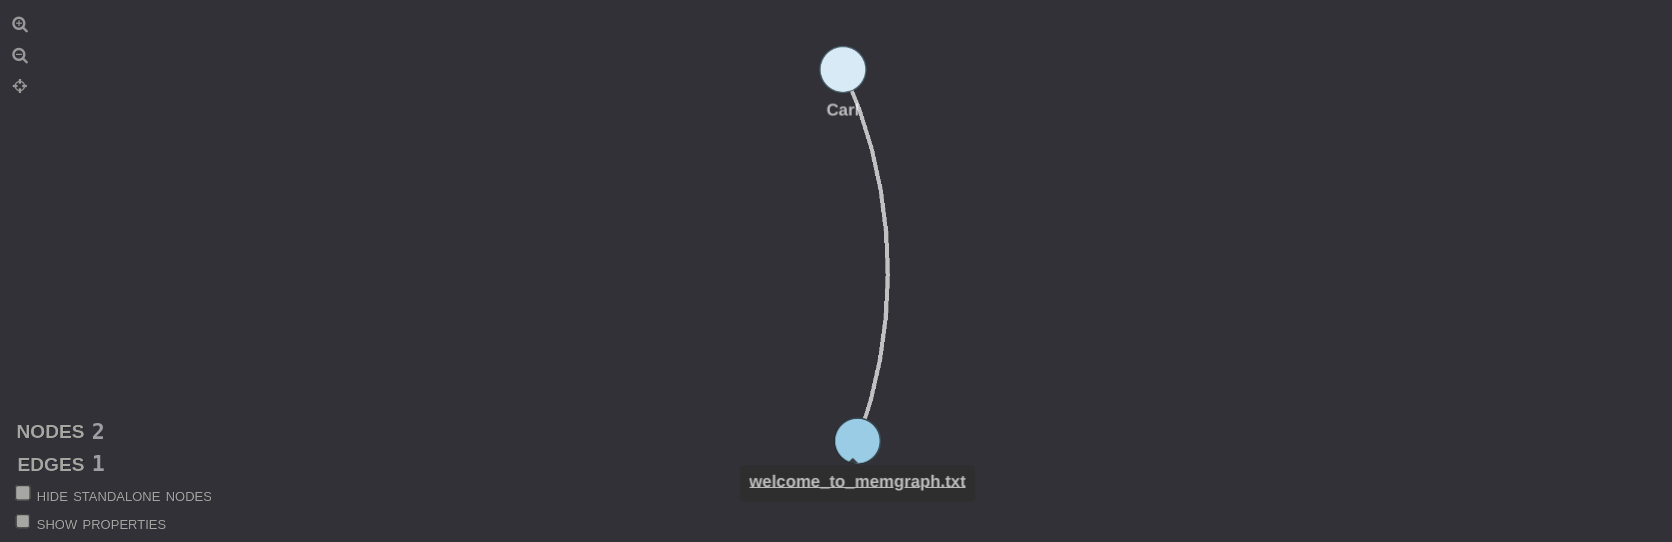

Carl has direct access to a file. But, Since Team nodes have access to specific folders, if Carl is a part of a team, he indirectly has access to all files in that folder. With the next query we can see how a depth-first search is performed from a node with the label Person with the name Carl to the node with the label File. It finds a path from Carl to a file directly or through other nodes. The symbol * represents depth-first search and the number 3 is a maximum depth (maximum number of jumps).

In [15]:
all_file_access_Carl = graphistry.cypher("""
MATCH p=(:Person {name:"Carl"})-[* ..3]->(:File)
RETURN p;
 """)
all_file_access_Carl.plot()

Screenshot:

![Screenshot from 2023-08-31 18-51-35.png](<attachment:Screenshot from 2023-08-31 18-51-35.png>)
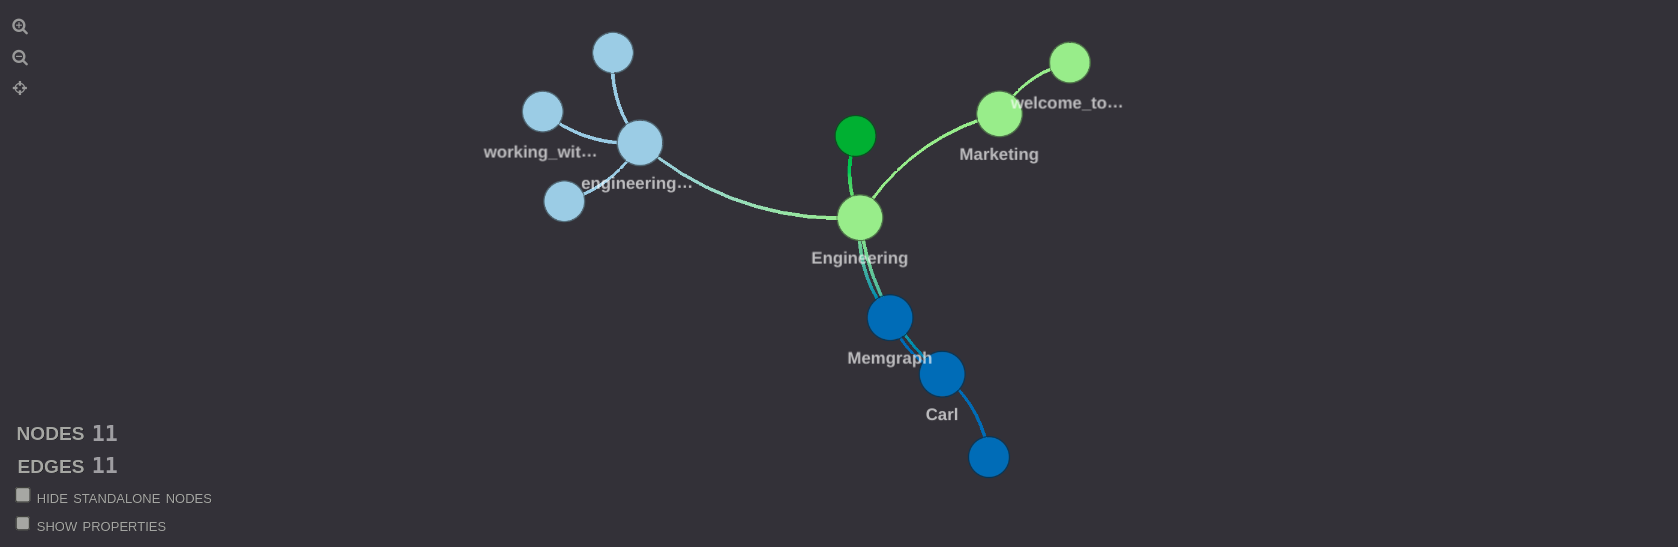

This can also be done for all Person nodes with executing the following query. This is an example why graph databases are great for Identity and Access Management.

In [16]:
all_file_access = graphistry.cypher("""
MATCH p=(:Person)-[* ..3]->(:File)
RETURN p;
 """)
all_file_access.plot()

Screenshot:

![Screenshot from 2023-08-31 18-52-42.png](<attachment:Screenshot from 2023-08-31 18-52-42.png>)
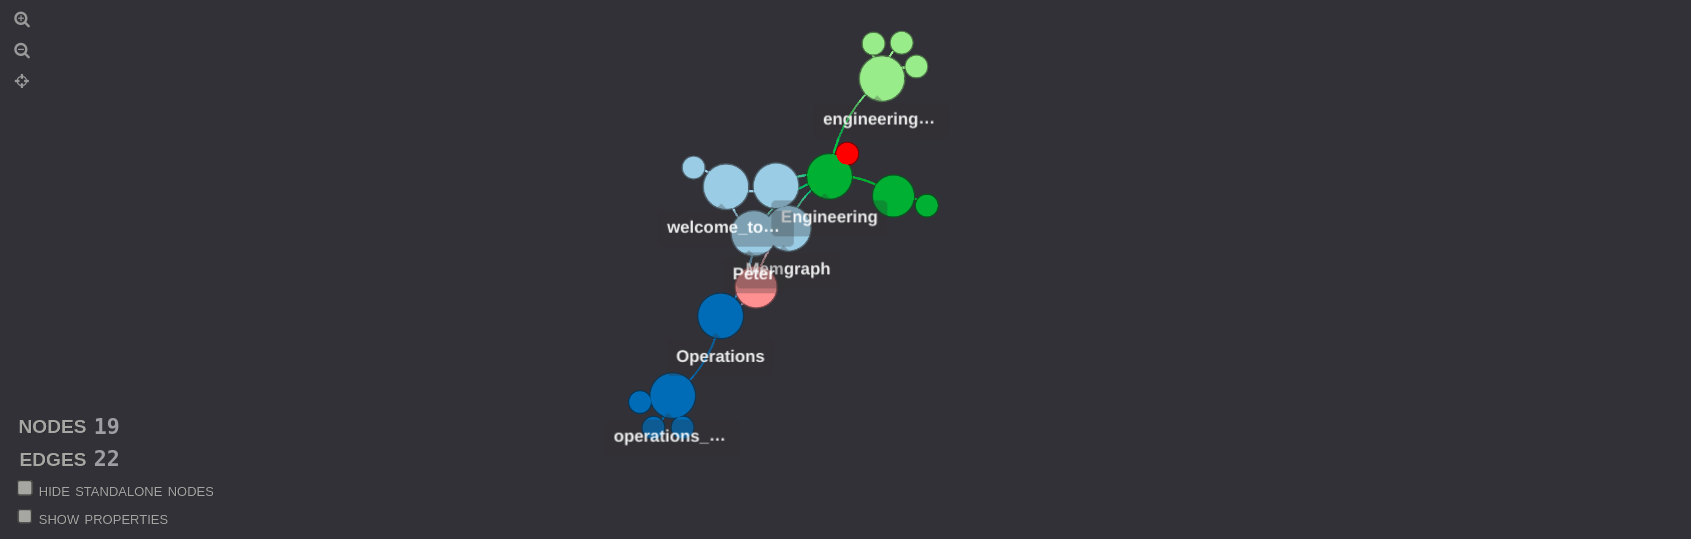

### Takeaway and further reading


Pygraphistry complements Memgraph by providing a specialized tool for creating rich and interactive visualizations of graph data stored in Memgraph. It allows users to gain deeper insights into their graph data by leveraging the advanced visualization capabilities of the Graphistry platform, especially when dealing with complex and extensive graph data sets. 

Feel free to get your hands on Graphistry and Memgraph and share your insights or questions with us on [Discord](https://discord.com/invite/memgraph) !

You can find out more about building and scaling modern IAM systems with Memgraph [here](https://memgraph.com/identity-access-management?utm_source=memgraph&utm_medium=referral&utm_campaign=bfb_blog&utm_content=iam) and on blogposts [What Makes Memgraph Great for Real-Time Performance in IAM Systems](https://memgraph.com/blog/what-makes-memgraph-great-for-real-time-performance-in-iam-systems), [Benefits Graph Databases Bring to Identity and Access Management](https://memgraph.com/blog/benefits-graph-databases-bring-to-identity-and-access-management) and [How Graphs Solve Two Biggest Problems of Traditional IAM Systems](https://memgraph.com/blog/how-graphs-solves-two-biggest-problems-of-traditional-iam-systems).
